In [ ]:
!pip install python_speech_features

In [ ]:
import numpy as np
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

In [ ]:
dataframe = pd.read_csv('SpotifyFeatures.csv', encoding='latin-1')
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969          4-Apr    0.814  
1       0.0868  174.003          4-Apr    0.816  
2       0.0362   99.488          4-May    0.368  
3       0.0395  171.758          4-Apr    0.227  
4       0.0456  140.576          4-Apr    0.390

In [ ]:
dataframe.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [ ]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [ ]:
pd.isnull(dataframe).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Text(0.5, 1.0, 'Popularity Distribution')

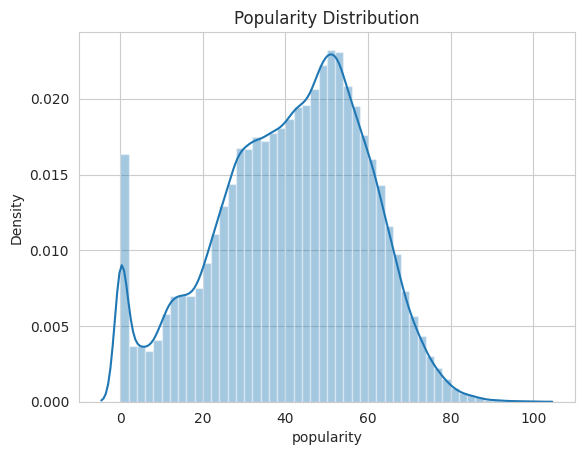

In [ ]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Time Signature')

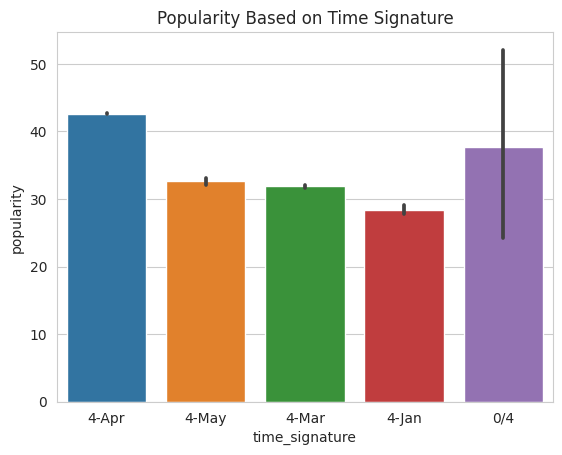

In [ ]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

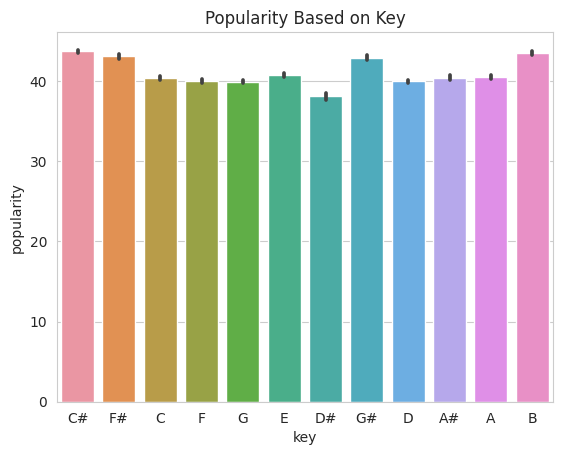

In [ ]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

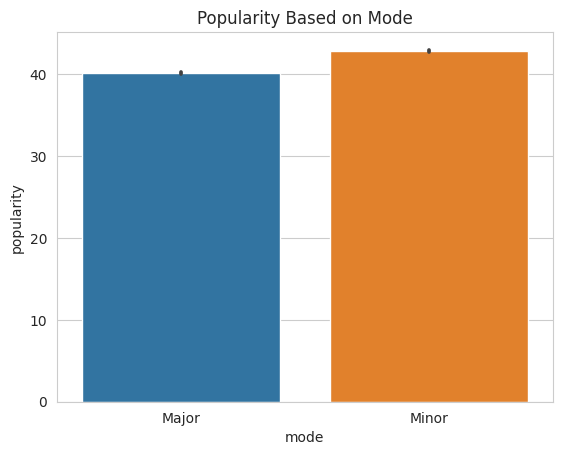

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

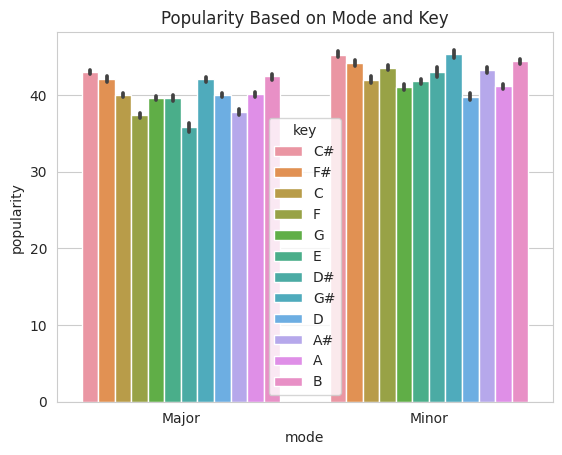

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

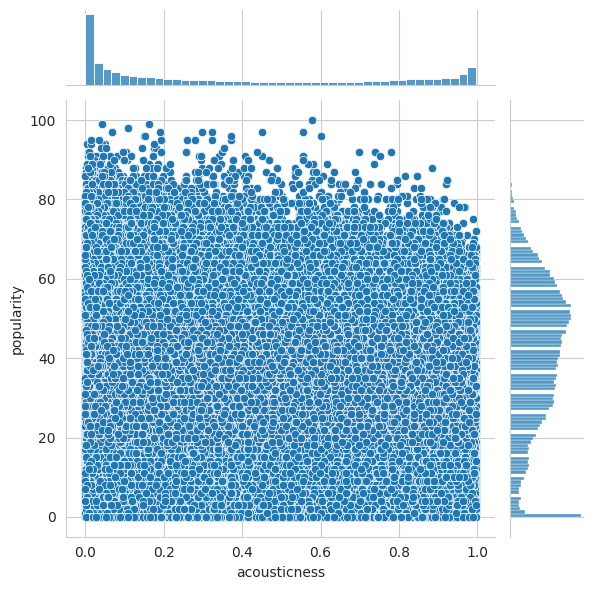

In [ ]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

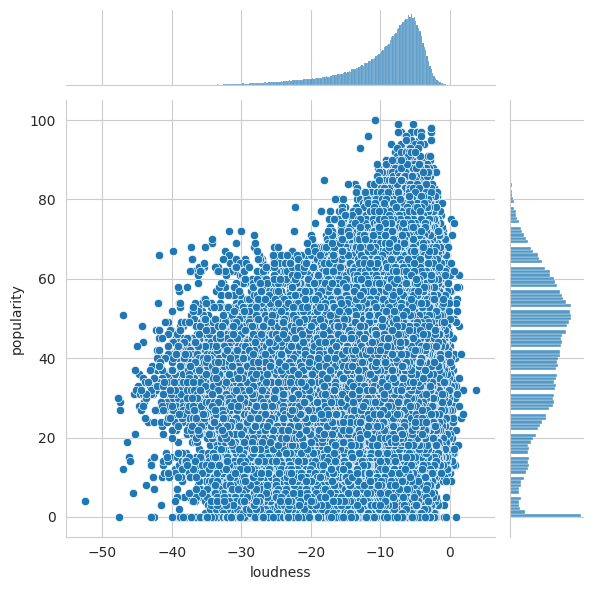

In [ ]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

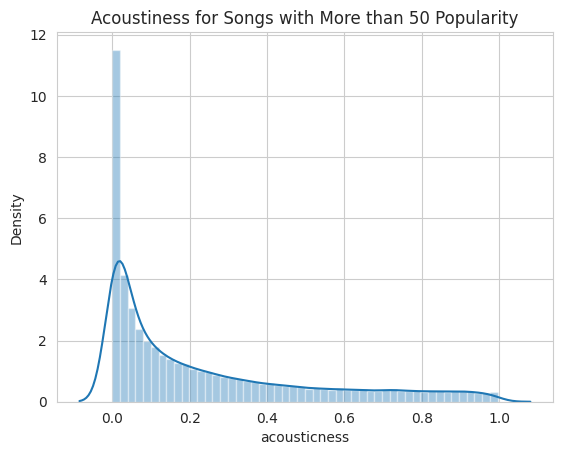

In [ ]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

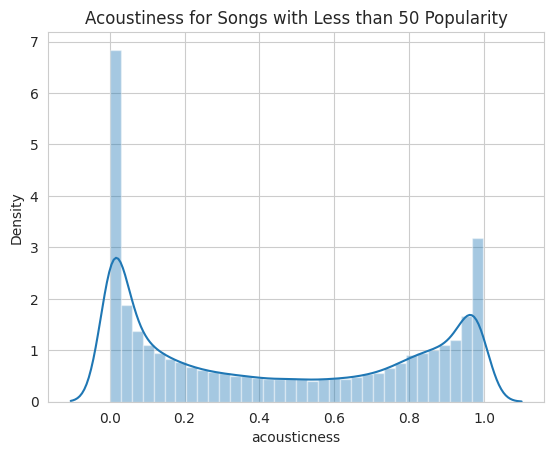

In [ ]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

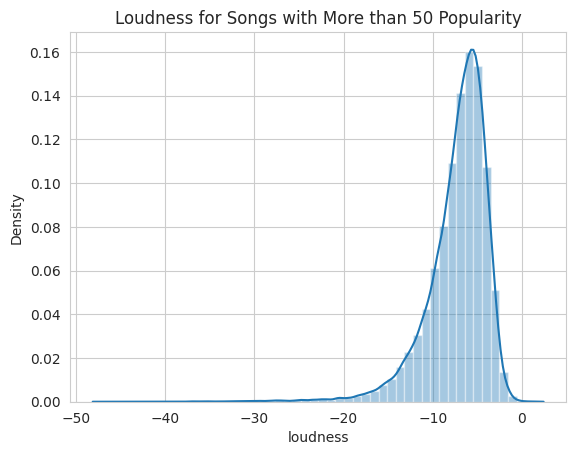

In [ ]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

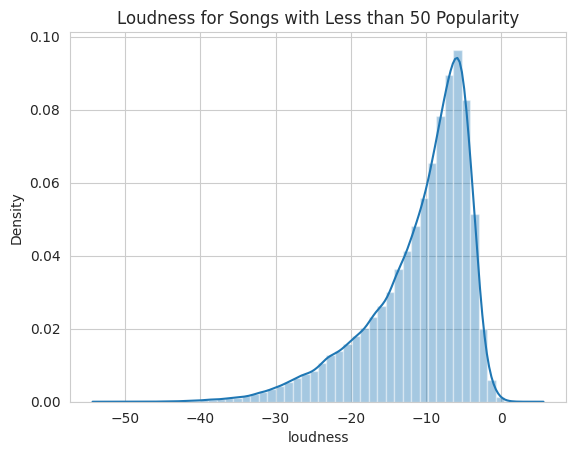

In [ ]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

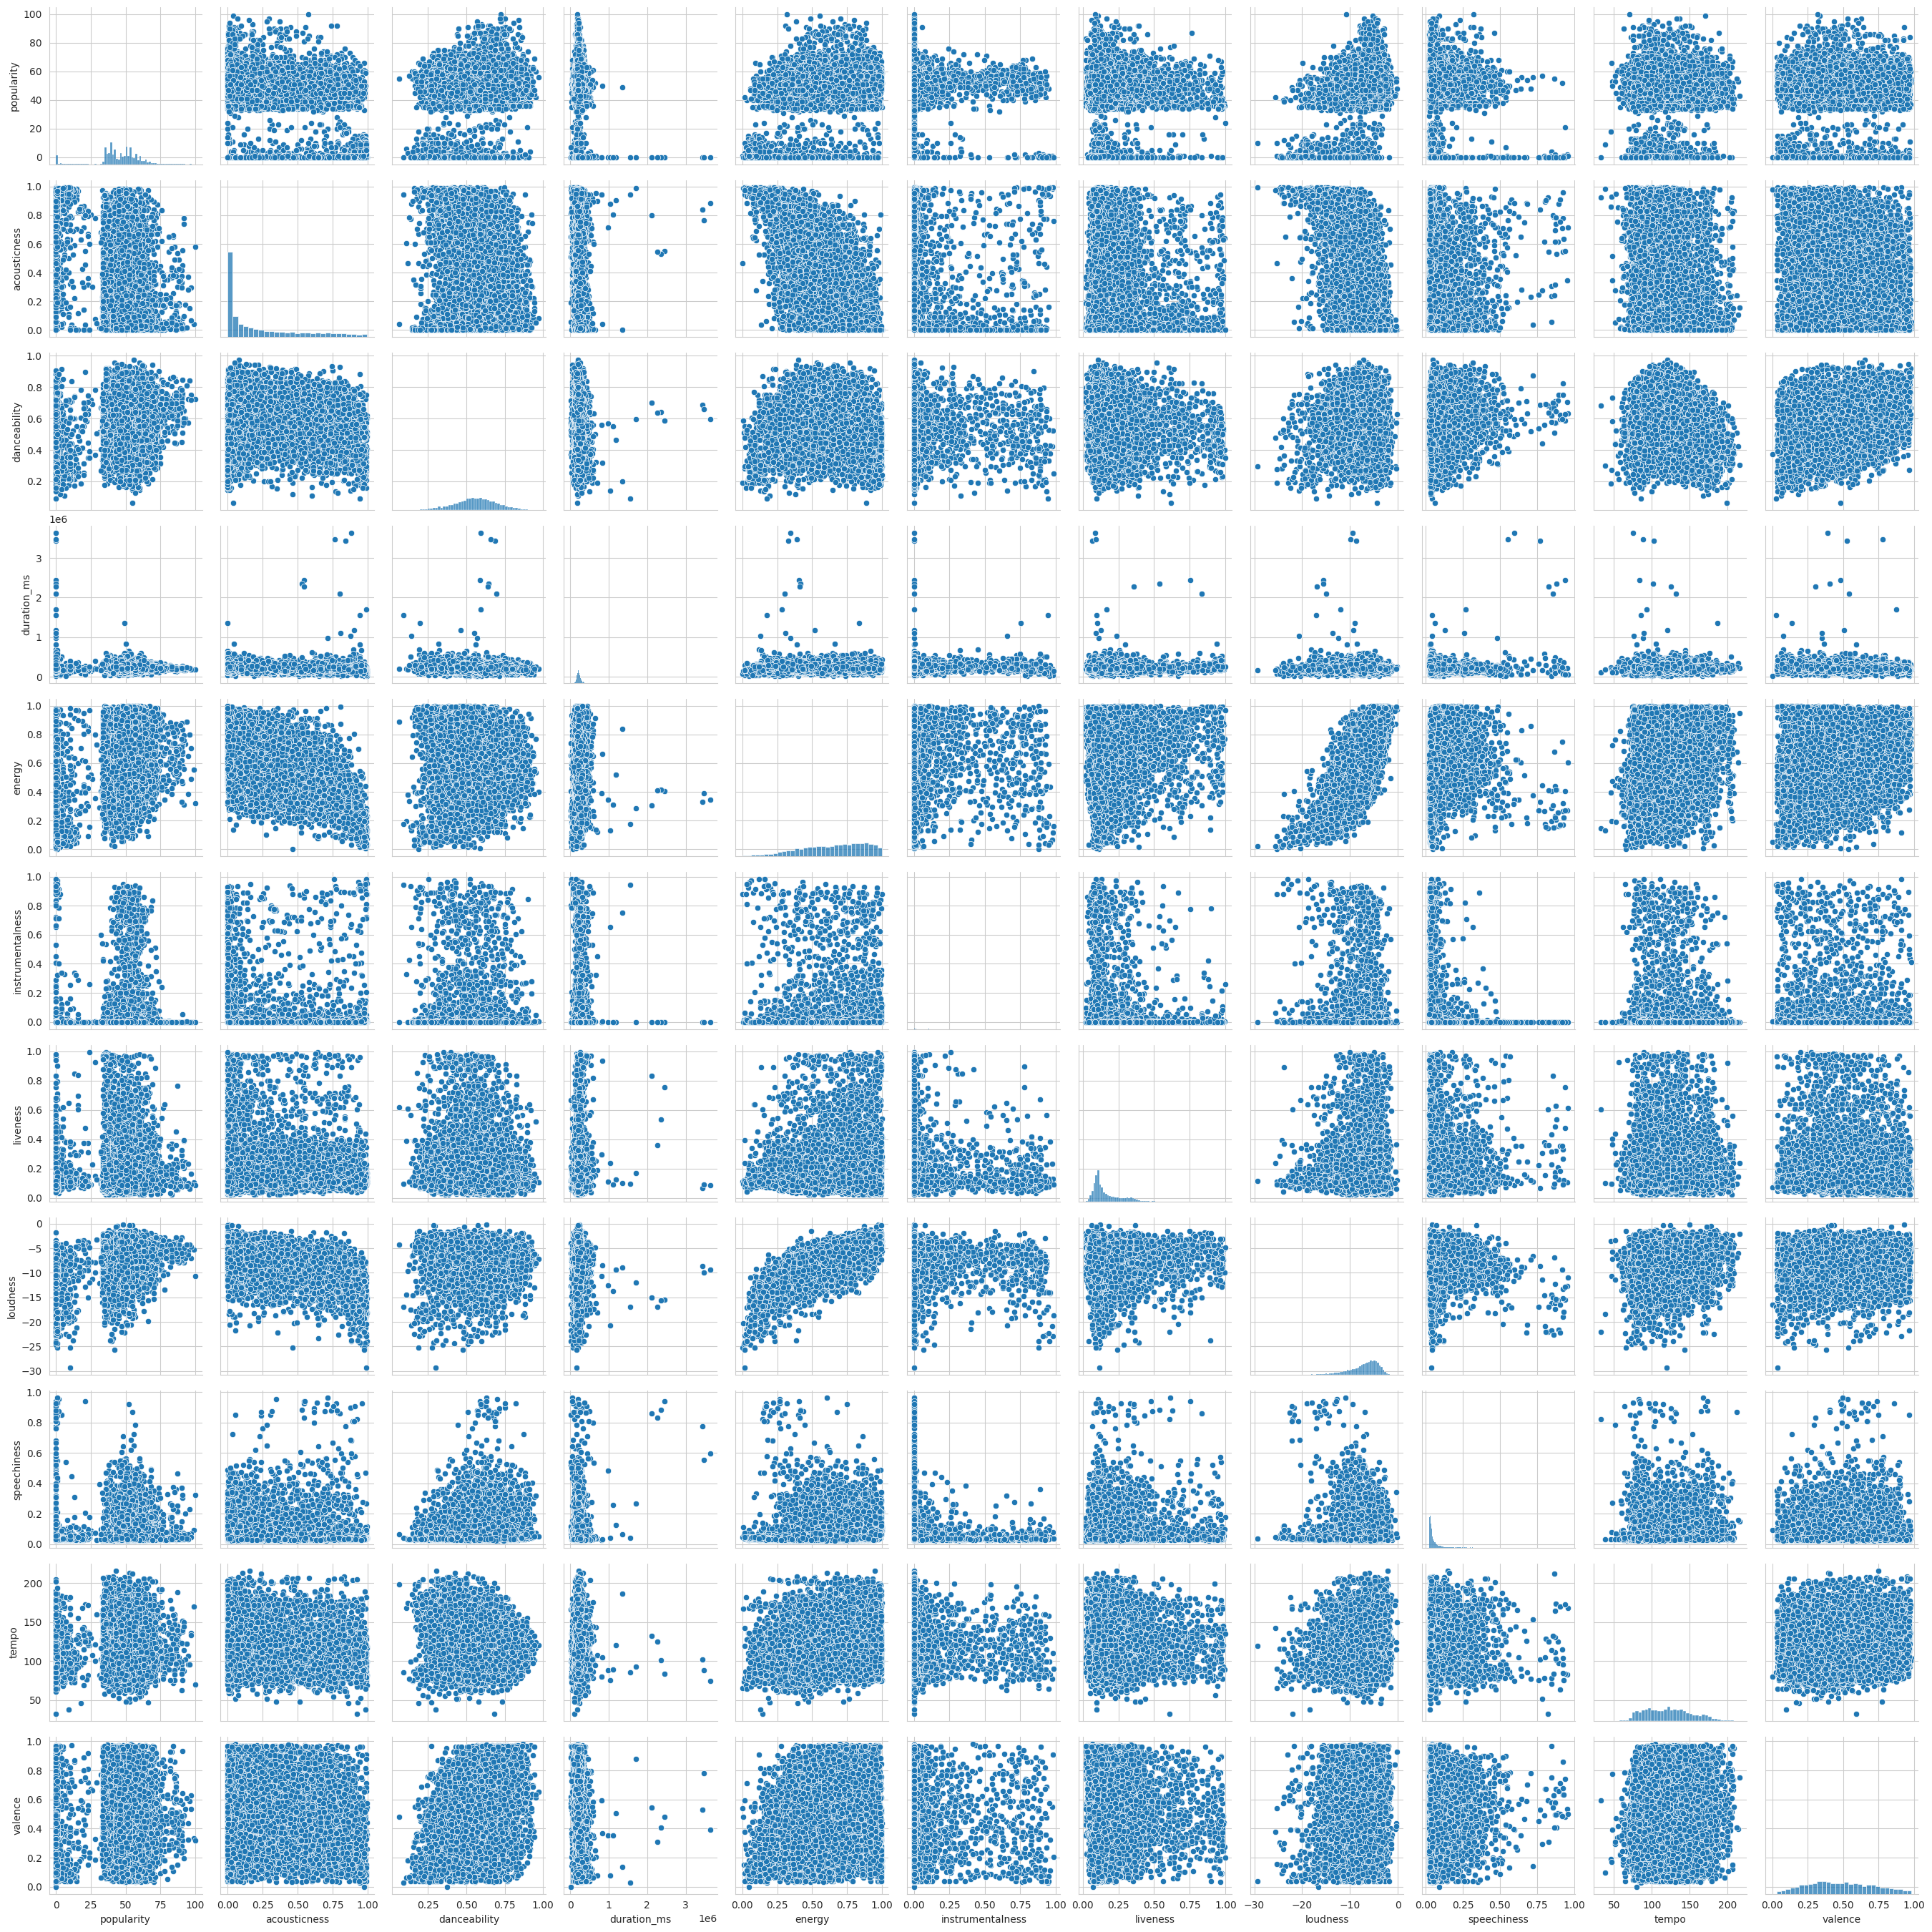

In [ ]:
dataframe = dataframe.head(10000)
sns.pairplot(dataframe)

In [ ]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

genre       artist_name                             track_name  \
1949      Country       Clay Walker             Like We Never Said Goodbye   
9192  Alternative       Marcus Marr                    The Trouble With Us   
1143  Alternative         Toploader  Dancing in the Moonlight - 2001 Remix   
5666  Alternative        Gang Starr                       Above The Clouds   
4400      Country  Townes Van Zandt                      To Live Is To Fly   

                    track_id  popularity  acousticness  danceability  \
1949  3kGbRQCTxgMzbqVi5RHy4I          41        0.2940         0.702   
9192  6CohXotXOrMVAB0bSPzqzm          42        0.3060         0.829   
1143  1OzY7RRZh3EcIKn7VKZUTx          63        0.0217         0.748   
5666  3ZBSXNYdTZVaBUQI3E2rF6          56        0.3120         0.462   
4400  31kaoIv1FU5Ddcv1hJJk2d          43        0.6350         0.658   

      duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
1949       181933   0.435          0.000000  10     0.280    -9.176  Major   
9192       222067   0.746          0.000557   8     0.174    -4.975  Major   
1143       233573   0.842          0.000004   9     0.357    -3.107  Major   
5666       221627   0.944          0.000149   7     0.367    -2.938  Major   
4400       195640   0.287          0.001870   8     0.117   -18.256  Major   

      speechiness    tempo time_signature  valence  
1949       0.0357  133.853          4-Apr    0.415  
9192       0.0600  121.106          4-Apr    0.839  
1143       0.0265  119.023          4-Apr    0.945  
5666       0.3150  172.330          4-Apr    0.650  
4400       0.0380  147.503          4-Apr    0.690

In [ ]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)

genre        artist_name                             track_name  \
7686      Country      Willie Nelson  Stay All Night (Stay a Little Longer)   
8141      Country       Carly Pearce                         Doin' It Right   
5340  Alternative  We Are Messengers                           Point To You   
1039      Country      The Guess Who            American Woman - 7" Version   
949       Country    Jameson Rodgers          Like You've Been There Before   

                    track_id  popularity  acousticness  danceability  \
7686  0ZXmbQXKbfXO8Cv9qxPdZu          39        0.4130         0.602   
8141  1X6Q0pEHOKycY661hm7yIY          37        0.2180         0.668   
5340  4LL2V5dDbSfgwCSMlkW13e          48        0.4010         0.396   
1039  5LPGZnsy07YNxeuTI1X3RT          54        0.0424         0.538   
949   5Z7e6uEMWhp3vHbXRRyvEp          41        0.3850         0.626   

      duration_ms  energy  instrumentalness key  liveness  loudness mode  \
7686       154160   0.366          0.000005   4    0.1920   -15.895    1   
8141       166160   0.770          0.000000   0    0.1000    -5.194    1   
5340       241747   0.704          0.000000   9    0.5990    -6.904    1   
1039       231640   0.841          0.001780  10    0.3120    -7.547    1   
949        216760   0.713          0.000059   8    0.0902    -4.580    1   

      speechiness    tempo time_signature  valence  
7686       0.0468  180.297          4-Apr    0.946  
8141       0.0557   87.525          4-Apr    0.538  
5340       0.0717   89.371          4-Apr    0.333  
1039       0.0375   93.077          4-Apr    0.881  
949        0.0431  131.952          4-Apr    0.482

In [ ]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre             artist_name  \
734       Country            Andrew Hyatt   
9272  Alternative             Jamie Grace   
7385      Country  Cross Canadian Ragweed   
7413      Country        The Replacements   
5442  Alternative                Daughtry   

                                  track_name                track_id  \
734                         My Kind Of Crazy  2K1bCFWijqtbXQfjX8IKzX   
9272                 Hold Me (feat. Tobymac)  2t97pZAsSgraYlocMNhkSe   
7385                                  Broken  53fSom4ZfTAGde5A4jfpCb   
7413  Alex Chilton - 2008 Remastered Version  2g9EvzLR2sYscJQubwKGqu   
5442                             No Surprise  6q4XLE5WeOBWftoc9gTl2P   

      popularity  acousticness  danceability  duration_ms  energy  \
734           53       0.64100         0.522       184208   0.550   
9272          45       0.53300         0.750       213440   0.808   
7385          37       0.29100         0.544       344133   0.546   
7413          50       0.00242         0.443       193980   0.924   
5442          53       0.00741         0.508       270640   0.823   

      instrumentalness key  liveness  loudness mode  speechiness    tempo  \
734           0.000000   4    0.3280    -7.980    1       0.0313   79.995   
9272          0.000000  11    0.0870    -4.074    1       0.0423  136.059   
7385          0.001090   4    0.0733    -7.000    1       0.0266   74.340   
7413          0.000037   5    0.3230    -7.384    1       0.0476  165.640   
5442          0.000000   6    0.1040    -3.711    1       0.0310   95.980   

     time_signature  valence  
734               0    0.676  
9272              0    0.890  
7385              0    0.385  
7413              0    0.793  
5442              0    0.152

In [ ]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

genre     artist_name                                  track_name  \
135           R&B   Mary J. Blige                  Be Without You - Kendu Mix   
136           R&B         Rihanna                                   Desperado   
137           R&B       Yung Bleu  Ice On My Baby (feat. Kevin Gates) - Remix   
138           R&B        Surfaces                   Heaven Falls / Fall on Me   
139           R&B  Olivia O'Brien                                 Love Myself   
...           ...             ...                                         ...   
9923  Alternative  Panteon Rococo                                 La Carencia   
9924  Alternative  Vicente Garcia                              Dulcito e Coco   
9931  Alternative        Hot Chip                         Hungry Child - Edit   
9932  Alternative   The Offspring                                    Hit That   
9946  Alternative    Joy Division          She's Lost Control - 2007 Remaster   

                    track_id  popularity  acousticness  danceability  \
135   2YegxR5As7BeQuVp2U6pek           1        0.0830         0.724   
136   6KFaHC9G178beAp7P0Vi5S           1        0.3230         0.685   
137   6muW8cSjJ3rusKJ0vH5olw           1        0.0675         0.762   
138   7yHqOZfsXYlicyoMt62yC6           1        0.3600         0.563   
139   4XzgjxGKqULifVf7mnDIQK           1        0.5960         0.653   
...                      ...         ...           ...           ...   
9923  2UalqFij5ANcOwrPm9CtPb           1        0.2460         0.555   
9924  7Li9u5C7CNLvqOqhrhZEML           1        0.8300         0.788   
9931  2XC3ZrY1UPHPlwFv7vcBPt           1        0.0564         0.643   
9932  3lfmqF0ULXRHlWxBeaHo3t           1        0.0280         0.707   
9946  49G0Rj1qpt75vdgiOo8QAE           1        0.0157         0.485   

      duration_ms  energy  instrumentalness key  liveness  loudness mode  \
135        246333   0.689          0.000000   8    0.3040    -5.922    0   
136        186467   0.610          0.000000   2    0.1020    -5.221    0   
137        199520   0.520          0.000004   3    0.1140    -5.237    0   
138        240597   0.366          0.002430  11    0.0955    -6.896    0   
139        213947   0.621          0.000000  11    0.0811    -5.721    0   
...           ...     ...               ...  ..       ...       ...  ...   
9923       423360   0.920          0.000000   5    0.9690    -5.634    0   
9924       189067   0.434          0.000004   3    0.0999    -7.815    0   
9931       208637   0.850          0.019900   2    0.2290    -6.386    1   
9932       169413   0.797          0.000000  11    0.0613    -3.032    0   
9946       237013   0.846          0.028700  11    0.0766    -7.630    0   

      speechiness    tempo time_signature  valence  
135        0.1350  146.496              0   0.6930  
136        0.0439   94.384              2   0.3230  
137        0.0959   75.047              0   0.0862  
138        0.1210   85.352              0   0.7680  
139        0.0409  100.006              0   0.4660  
...           ...      ...            ...      ...  
9923       0.1590  102.601              0   0.4520  
9924       0.0302   93.003              0   0.5850  
9931       0.0513  120.041              0   0.5760  
9932       0.0317  131.950              0   0.9650  
9946       0.0528  144.246              0   0.7430  

[1892 rows x 18 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [ ]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict)
print("AUC: " + str(LR_AUC))

Accuracy: 0.804375
AUC: 0.5


In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))

Accuracy: 0.799375
AUC: 0.5089814339015617


In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict)
print("AUC: " + str(KNN_AUC))

Accuracy: 0.77625
AUC: 0.5006516380318298


In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("AUC: " + str(DT_AUC))

Accuracy: 0.724375
AUC: 0.5590768833580335


In [ ]:
training_LSVC = training.sample(10000, replace=True)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']
X_test_LSVC = dataframe.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

In [ ]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict)
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.889
AUC: 0.8277452891487977


In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],

                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy]})
model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],

                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC]})


In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)


Model  Accuracy
4               LinearSVC  0.889000
0      LogisticRegression  0.804375
1  RandomForestClassifier  0.799375
2    KNeighborsClassifier  0.776250
3  DecisionTreeClassifier  0.724375

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

Model       AUC
4               LinearSVC  0.827745
3  DecisionTreeClassifier  0.559077
1  RandomForestClassifier  0.508981
2    KNeighborsClassifier  0.500652
0      LogisticRegression  0.500000